In [11]:

import pandas as pd
import numpy as np
import scipy.stats as stats
data = {
    "Color": np.random.choice(["Red", "Blue", "Green", "Yellow"], size=100),
    "Fruit": np.random.choice(["Apple", "Banana", "Orange", "Grapes"], size=100),
}

df = pd.DataFrame(data)

# Display the first few rows
df.head()

,Color,Fruit
0,Green,Orange
1,Yellow,Banana
2,Red,Orange
3,Yellow,Orange
4,Red,Grapes


In [13]:
def cramers_v(column1, column2):
    contingency_table = pd.crosstab(df[column1], df[column2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total sample size
    min_dim = min(contingency_table.shape) - 1  # Minimum of (rows - 1, columns - 1)

    return np.sqrt(chi2 / (n * min_dim))

# Compute Cramér's V

cols = (df.select_dtypes(exclude="number").columns)

cm = (pd
        .DataFrame(index=cols)
        .assign(**{
            f"{col}": np.ones_like(cols) for col in cols
        }))

print(f"{cm.head()}")

for col1 in cols:
    for col2 in cols:
      if col1 == col2:
        continue
      cm.loc[col1, col2] = cramers_v(col1, col2)

cm = cm.astype("float")

      Color Fruit
Color     1     1
Fruit     1     1


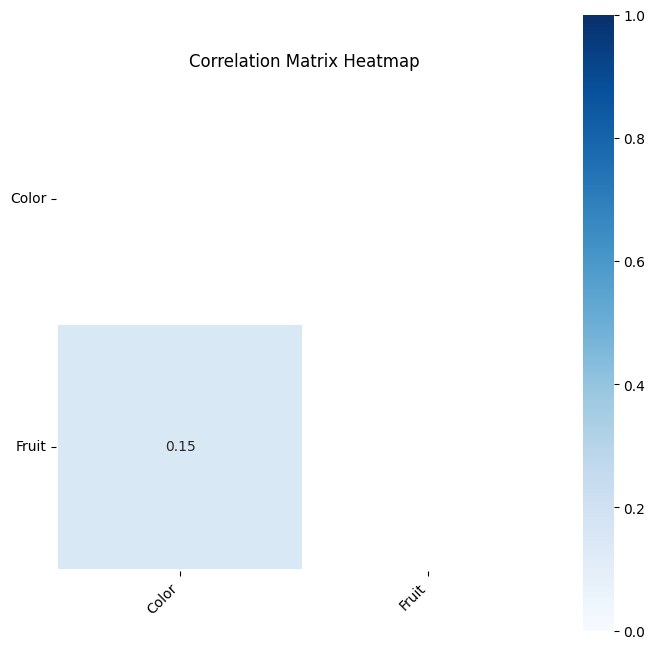

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

mask = np.zeros_like(cm, dtype=bool)
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(
    data=cm,
    vmin=0,
    vmax=1,
    cmap="Blues",
    annot=True,
    fmt=".2f",
    linewidths=1.5,
    linecolor="white",
    cbar=True,
    square=True,
    mask=mask,
    ax=ax
)

hm.set_xticklabels(hm.get_xticklabels(),
                   rotation=45,
                   ha="right")

hm.set_yticklabels(hm.get_yticklabels(),
                   rotation=0)

hm.set_title("Correlation Matrix Heatmap")

plt.show()